<a href="https://colab.research.google.com/github/aartigoswami91/EDA/blob/main/Single_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
#########Keras Libraries and Modules ###########
import tensorflow as tf
from  keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

In [11]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

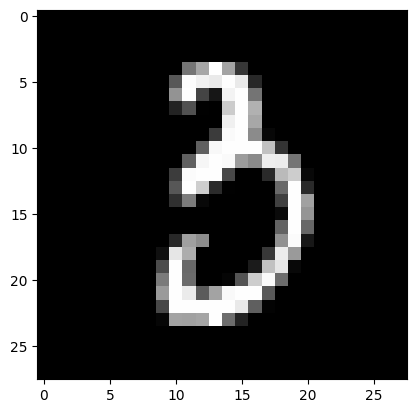

In [15]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 150
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

In [17]:
X = train.iloc[:,1:]
y = train['label']

In [19]:
print(X.shape)
print(y.shape)

(5157, 784)
(5157,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [49]:
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(4125, 784) (1032, 784)
(4125,) (1032,)


In [50]:
per = Perceptron(verbose=2)
per.fit(X_train, y_train)
per_preds_train = per.predict(X_train)




-- Epoch 1
Norm: 20599.67, NNZs: 522, Bias: -22.000000, T: 4125, Avg. loss: 59110.557576
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24572.71, NNZs: 531, Bias: -29.000000, T: 8250, Avg. loss: 40549.545212
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27363.45, NNZs: 538, Bias: -39.000000, T: 12375, Avg. loss: 32586.530667
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 29737.28, NNZs: 541, Bias: -50.000000, T: 16500, Avg. loss: 31763.216970
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 33000.64, NNZs: 544, Bias: -54.000000, T: 20625, Avg. loss: 21697.116121
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 35207.98, NNZs: 551, Bias: -61.000000, T: 24750, Avg. loss: 23102.804121
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 37237.54, NNZs: 551, Bias: -68.000000, T: 28875, Avg. loss: 15496.724848
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 38968.41, NNZs: 553, Bias: -75.000000, T: 33000, Avg. loss: 15641.988364
Total training time: 0.05 seconds.
--

ValueError: ignored

In [44]:
print(per.n_iter_)

38


In [45]:
per.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
per.loss_function_

In [60]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print(conf_matrix)
  print(acc_score)
  print(class_rep)

In [61]:
model_eval(y_train,per_preds_train)

[[398   0   1   0   0   0   0   0   0   2]
 [  0 468   0   0   0   0   0   0   0   1]
 [  0   4 428   0   3   1   0   0   1   1]
 [  0   5   7 346   0  21   0   0   4  14]
 [  0   0   1   0 379   0   0   0   0   7]
 [  0   2   4   1   6 358   0   0   3   7]
 [  3   2   3   0   9   0 412   0   2   5]
 [  0   0   2   0   8   0   0 336   1  82]
 [  4  19   6   6   8  26   0   0 291  29]
 [  1   1   0   0   7   1   0   1   0 387]]
0.921939393939394
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       401
           1       0.93      1.00      0.96       469
           2       0.95      0.98      0.96       438
           3       0.98      0.87      0.92       397
           4       0.90      0.98      0.94       387
           5       0.88      0.94      0.91       381
           6       1.00      0.94      0.97       436
           7       1.00      0.78      0.88       429
           8       0.96      0.75      0.84       389
          